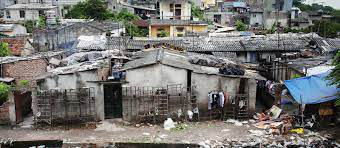

In [84]:
from PIL import Image
Image.open('poverty.jfif')

# Brief Description

The purpose of this project was to understand the relationship between extreme poverty against factors such as GDP growth, population growth, literacy rate and unemployment rate. And to understand this relationship I used the random forest regressor algorithm to conduct the regression.

Random forest is a supervised machine learning model that uses ensemble learning to conduct regression/classification problems. Ensemble learning uses multiple models trained over the same dataset to make a more accurate prediction/classification. Put simply, random forest makes use of multiple decision trees, averages to make a more powerful prediction/classification.

My sample group to conduct this analysis was the BRICS nations. The BRICS is an association of five major emerging market economies (Brazil, Russia, India, China, and South Africa) and usually, in developing countries, there is a higher chance of witnessing extreme poverty than in developed nations. 

As defined by the World Bank extreme poverty refers to an income below the international poverty line of $1.90 per day.


In [1]:
#Importing the libraries for the project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings('ignore')

# Data Importation and Data Wrangling

## GDP Growth Data Cleaning

In [2]:
#import csv file with the GDP growth data
df_gdp = pd.read_csv('GDP growth (annual %).csv', 
                     skiprows=4)
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.04,6.43,-0.02,3.54,2.12,5.48,1.27,-2.09,-22.32,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.24,7.98,5.16,4.58,5.33,...,0.92,4.20,3.98,2.95,2.22,2.56,2.49,2.03,-2.89,4.30
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.75,5.60,2.72,1.45,2.26,2.65,1.19,3.91,-2.35,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.85,3.77,7.27,5.40,4.05,...,5.14,6.10,5.93,2.75,0.13,2.32,2.95,3.20,-0.90,3.91
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.54,4.95,4.82,0.94,-2.58,-0.15,-1.32,-0.70,-5.50,0.70


In [3]:
#Extracting the BRICS GDP into seperate data frames, then transposing the data frames so as to display the information as a traditional column
df_gdp_bra = df_gdp[df_gdp['Country Name'] == 'Brazil']
df_gdp_bra = df_gdp_bra.T

df_gdp_rus = df_gdp[df_gdp['Country Name'] == 'Russian Federation']
df_gdp_rus = df_gdp_rus.T

df_gdp_ind = df_gdp[df_gdp['Country Name'] == 'India']
df_gdp_ind = df_gdp_ind.T

df_gdp_chi = df_gdp[df_gdp['Country Name'] == 'China']
df_gdp_chi = df_gdp_chi.T

df_gdp_rsa = df_gdp[df_gdp['Country Name'] == 'South Africa']
df_gdp_rsa = df_gdp_rsa.T

df_gdp_world = df_gdp[df_gdp['Country Name'] == 'World']
df_gdp_world = df_gdp_world.T

In [4]:
#Checking dataframe
df_gdp_rsa.head()

,263
Country Name,South Africa
Country Code,ZAF
Indicator Name,GDP growth (annual %)
Indicator Code,NY.GDP.MKTP.KD.ZG
1960,NaN


In [5]:
#Further cleaning of dataframes by dropping unnecessary rows
df_gdp_bra_clean = df_gdp_bra.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name',
                                    'Indicator Code'], 
                                    axis=0)

df_gdp_rus_clean = df_gdp_rus.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code'], 
                                    axis=0)

df_gdp_ind_clean = df_gdp_ind.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code'], 
                                    axis=0)

df_gdp_chi_clean = df_gdp_chi.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code'],
                                    axis=0)

df_gdp_rsa_clean = df_gdp_rsa.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code'], 
                                    axis=0)

df_gdp_world_clean = df_gdp_world.drop(['Country Name', 
                                        'Country Code', 
                                        'Indicator Name', 
                                        'Indicator Code'], 
                                        axis=0)


In [6]:
#Checking dataframe
df_gdp_rsa_clean.head()

,263
1960,NaN
1961,3.84
1962,6.18
1963,7.37
1964,7.94


In [7]:
#renaming the columns and the index
df_gdp_bra_clean.rename(columns = {29:'Brazil GDP Growth'}, 
                        inplace= True)
df_gdp_bra_clean.index.names = ['Year']

df_gdp_rus_clean.rename(columns = {202:'Russia GDP Growth'}, 
                        inplace= True)
df_gdp_rus_clean.index.names = ['Year']

df_gdp_ind_clean.rename(columns = {109:'India GDP Growth'}, 
                        inplace= True)
df_gdp_ind_clean.index.names = ['Year']

df_gdp_chi_clean.rename(columns = {40:'China GDP Growth'}, 
                        inplace= True)
df_gdp_chi_clean.index.names = ['Year']

df_gdp_rsa_clean.rename(columns = {263:'South Africa GDP Growth'}, 
                        inplace= True)
df_gdp_rsa_clean.index.names = ['Year']

df_gdp_world_clean.rename(columns = {259:'World GDP Growth'}, 
                          inplace= True)
df_gdp_world_clean.index.names = ['Year']

In [8]:
#Concatenating the data frames to make one data frame for GDP
df_gdp_brics = pd.concat([df_gdp_bra_clean, 
                          df_gdp_rus_clean, 
                          df_gdp_ind_clean, 
                          df_gdp_chi_clean, 
                          df_gdp_rsa_clean,
                          df_gdp_world_clean],
                         axis = 1)

df_gdp_brics.tail()

,Brazil GDP Growth,Russia GDP Growth,India GDP Growth,China GDP Growth,South Africa GDP Growth,World GDP Growth
Year,,,,,,
2017,1.32,1.83,6.80,6.95,1.16,3.38
2018,1.78,2.81,6.45,6.75,1.49,3.28
2019,1.22,2.20,3.74,5.95,0.11,2.61
2020,-3.88,-2.68,-6.60,2.24,-6.43,-3.27
2021,4.62,4.82,8.95,8.11,4.91,5.80


In [9]:
#checking on the dataframe data type
df_gdp_brics.dtypes

Brazil GDP Growth          object
Russia GDP Growth          object
India GDP Growth           object
China GDP Growth           object
South Africa GDP Growth    object
World GDP Growth           object
dtype: object

In [10]:
#Converting the GDP to a float data type
df_gdp_brics['Brazil GDP Growth'] =pd.to_numeric(df_gdp_brics['Brazil GDP Growth'])

df_gdp_brics['Russia GDP Growth'] =pd.to_numeric(df_gdp_brics['Russia GDP Growth'])

df_gdp_brics['India GDP Growth'] =pd.to_numeric(df_gdp_brics['India GDP Growth'])

df_gdp_brics['China GDP Growth'] =pd.to_numeric(df_gdp_brics['China GDP Growth'])

df_gdp_brics['South Africa GDP Growth'] =pd.to_numeric(df_gdp_brics['South Africa GDP Growth'])

df_gdp_brics['World GDP Growth'] =pd.to_numeric(df_gdp_brics['World GDP Growth'])

print(df_gdp_brics.dtypes)

Brazil GDP Growth          float64
Russia GDP Growth          float64
India GDP Growth           float64
China GDP Growth           float64
South Africa GDP Growth    float64
World GDP Growth           float64
dtype: object


In [11]:
#Slicing the data frame so data starts from 1981 to 2019
df_gdp_brics_final = df_gdp_brics.iloc[31:-2]
df_gdp_brics_final.head()

,Brazil GDP Growth,Russia GDP Growth,India GDP Growth,China GDP Growth,South Africa GDP Growth,World GDP Growth
Year,,,,,,
1991,1.03,-5.05,1.06,9.26,-1.02,1.46
1992,-0.54,-14.53,5.48,14.22,-2.14,2.07
1993,4.92,-8.67,4.75,13.88,1.23,1.81
1994,5.85,-12.57,6.66,13.04,3.20,3.31
1995,4.22,-4.14,7.57,10.95,3.10,3.09


In [12]:
#checking if there are any null/missing values in the data
df_gdp_brics_final.isnull().sum() #no null/missing values in the data

Brazil GDP Growth          0
Russia GDP Growth          0
India GDP Growth           0
China GDP Growth           0
South Africa GDP Growth    0
World GDP Growth           0
dtype: int64

In [13]:
#stacking columns in the dataframe to create  one GDP growth column
bra_gdp_growth = df_gdp_brics_final['Brazil GDP Growth']
rus_gdp_growth = df_gdp_brics_final['Russia GDP Growth']
ind_gdp_growth = df_gdp_brics_final['India GDP Growth']
chi_gdp_growth = df_gdp_brics_final['China GDP Growth']
rsa_gdp_growth = df_gdp_brics_final['South Africa GDP Growth']

df_gdp_brics_final_growth = pd.DataFrame(np.hstack((bra_gdp_growth,
                                                    rus_gdp_growth, 
                                                    ind_gdp_growth,
                                                    chi_gdp_growth,
                                                    rsa_gdp_growth)), 
                                         columns=['GDP Growth (BRICS)'])
df_gdp_brics_final_growth

,GDP Growth (BRICS)
0,1.03
1,-0.54
2,4.92
3,5.85
4,4.22
...,...
140,1.32
141,0.66
142,1.16
143,1.49


## Population Growth Data Cleaning

In [14]:
#importing csv file with population data
df_pop = pd.read_csv('Population growth (annual %).csv', 
                     skiprows = 4)
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.24,1.43,0.82,0.58,0.57,...,0.58,0.59,0.54,0.50,0.47,0.46,0.44,0.43,0.40,NaN
1,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.54,2.58,2.61,2.63,2.66,...,2.76,2.75,2.73,2.71,2.69,2.67,2.64,2.61,2.57,NaN
2,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.90,1.97,2.03,2.09,2.15,...,3.49,3.36,3.08,2.78,2.55,2.38,2.31,2.30,2.30,NaN
3,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,NaN,2.09,2.13,2.17,2.20,2.23,...,2.75,2.75,2.74,2.73,2.72,2.70,2.68,2.66,2.64,NaN
4,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.39,1.38,1.26,0.97,0.62,...,3.55,3.50,3.44,3.38,3.32,3.28,3.24,3.22,3.20,NaN


In [15]:
#Extracting the BRICS population data into seperate data frames and transposing the data frames so they display correctly
df_pop_bra = df_pop[df_pop['Country Name'] == 'Brazil']
df_pop_bra = df_pop_bra.T

df_pop_rus = df_pop[df_gdp['Country Name'] == 'Russian Federation']
df_pop_rus = df_pop_rus.T

df_pop_ind = df_pop[df_gdp['Country Name'] == 'India']
df_pop_ind = df_pop_ind.T

df_pop_chi = df_pop[df_gdp['Country Name'] == 'China']
df_pop_chi = df_pop_chi.T

df_pop_rsa = df_pop[df_gdp['Country Name'] == 'South Africa']
df_pop_rsa = df_pop_rsa.T

df_pop_world = df_pop[df_gdp['Country Name'] == 'World']
df_pop_world = df_pop_world.T

In [16]:
#Checking if dataframes are transposed
df_pop_rsa.head()

,263
Country Name,South Africa
Country Code,ZAF
Indicator Name,Population growth (annual %)
Indicator Code,SP.POP.GROW
1960,NaN


In [17]:
#Dropping unnecessary rows
df_pop_bra_clean = df_pop_bra.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code' ],
                                   axis=0)

df_pop_rus_clean = df_pop_rus.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code' ], 
                                   axis=0)

df_pop_ind_clean = df_pop_ind.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code' ], 
                                   axis=0)

df_pop_chi_clean = df_pop_chi.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code' ], 
                                   axis=0)

df_pop_rsa_clean = df_pop_rsa.drop(['Country Name', 
                                    'Country Code', 
                                    'Indicator Name', 
                                    'Indicator Code' ], 
                                   axis=0)

df_pop_world_clean = df_pop_world.drop(['Country Name', 
                                        'Country Code', 
                                        'Indicator Name', 
                                        'Indicator Code' ], 
                                       axis=0)

In [18]:
#Checking if unnecessary rows are removed
df_pop_world_clean.head()

,259
1960,NaN
1961,1.30
1962,1.72
1963,2.08
1964,2.05


In [19]:
#Renaming column names
df_pop_bra_clean.rename(columns = {29:'Brazil Population Growth'}, 
                        inplace= True)
df_pop_bra_clean.index.names = ['Year']

df_pop_rus_clean.rename(columns = {202:'Russia Population Growth'}, 
                        inplace= True)
df_pop_rus_clean.index.names = ['Year']

df_pop_ind_clean.rename(columns = {109:'India Population Growth'}, 
                        inplace= True)
df_pop_ind_clean.index.names = ['Year']

df_pop_chi_clean.rename(columns = {40:'China Population Growth'}, 
                        inplace= True)
df_pop_chi_clean.index.names = ['Year']

df_pop_rsa_clean.rename(columns = {263:'South Africa Population Growth'}, 
                        inplace= True)
df_pop_rsa_clean.index.names = ['Year']

df_pop_world_clean.rename(columns = {259:'World Population Growth'}, 
                          inplace= True)
df_pop_world_clean.index.names = ['Year']

In [20]:
#checking on the data types
print(df_pop_bra_clean.dtypes)
print(df_pop_rus_clean.dtypes)
print(df_pop_ind_clean.dtypes)
print(df_pop_chi_clean.dtypes)
print(df_pop_rsa_clean.dtypes)
print(df_pop_world_clean.dtypes)

Brazil Population Growth    object
dtype: object
Russia Population Growth    object
dtype: object
India Population Growth    object
dtype: object
China Population Growth    object
dtype: object
South Africa Population Growth    object
dtype: object
World Population Growth    object
dtype: object


In [21]:
#Converting the population data to a float data type
df_pop_bra_clean['Brazil Population Growth'] = pd.to_numeric(df_pop_bra_clean['Brazil Population Growth'])

df_pop_rus_clean['Russia Population Growth'] = pd.to_numeric(df_pop_rus_clean['Russia Population Growth'])

df_pop_ind_clean['India Population Growth'] = pd.to_numeric(df_pop_ind_clean['India Population Growth'])

df_pop_chi_clean['China Population Growth'] = pd.to_numeric(df_pop_chi_clean['China Population Growth'])

df_pop_rsa_clean['South Africa Population Growth'] = pd.to_numeric(df_pop_rsa_clean['South Africa Population Growth'])

df_pop_world_clean['World Population Growth'] = pd.to_numeric(df_pop_world_clean['World Population Growth'])

print(df_pop_bra_clean.dtypes)
print(df_pop_rus_clean.dtypes)
print(df_pop_ind_clean.dtypes)
print(df_pop_chi_clean.dtypes)
print(df_pop_rsa_clean.dtypes)
print(df_pop_world_clean.dtypes)

Brazil Population Growth    float64
dtype: object
Russia Population Growth    float64
dtype: object
India Population Growth    float64
dtype: object
China Population Growth    float64
dtype: object
South Africa Population Growth    float64
dtype: object
World Population Growth    float64
dtype: object


In [22]:
#Concatenating the dataframes
df_pop_brics = pd.concat([df_pop_bra_clean, 
                          df_pop_rus_clean, 
                          df_pop_ind_clean, 
                          df_pop_chi_clean, 
                          df_pop_rsa_clean,
                          df_pop_world_clean], 
                          axis = 1)
df_pop_brics.tail()

,Brazil Population Growth,Russia Population Growth,India Population Growth,China Population Growth,South Africa Population Growth,World Population Growth
Year,,,,,,
2018,0.78,-0.01,1.04,0.47,1.36,1.11
2019,0.75,-0.05,1.01,0.35,1.32,1.07
2020,0.71,-0.23,0.99,0.24,1.27,1.04
2021,0.67,-0.44,0.97,0.09,1.23,0.94
Unnamed: 66,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Slicing the data frame so time period is from 1991 to 2019
df_pop_brics_final = df_pop_brics.iloc[31:-3]
df_pop_brics_final

,Brazil Population Growth,Russia Population Growth,India Population Growth,China Population Growth,South Africa Population Growth,World Population Growth
Year,,,,,,
1991,1.76,0.29,2.04,1.36,2.47,1.67
1992,1.71,0.10,2.00,1.23,2.50,1.57
1993,1.66,-0.05,1.97,1.15,2.45,1.56
1994,1.63,-0.03,1.94,1.13,2.32,1.52
1995,1.61,-0.02,1.92,1.09,2.13,1.51
1996,1.59,-0.15,1.90,1.05,1.92,1.45
1997,1.56,-0.17,1.87,1.02,1.75,1.43
1998,1.53,-0.17,1.84,0.96,1.60,1.39
1999,1.48,-0.31,1.81,0.87,1.49,1.35


In [24]:
#checking for missing/Null values
df_pop_brics_final.isnull().sum() #no missing values

Brazil Population Growth          0
Russia Population Growth          0
India Population Growth           0
China Population Growth           0
South Africa Population Growth    0
World Population Growth           0
dtype: int64

In [25]:
#stacking columns in the dataframe to create  one Pop growth column
bra_pop_growth = df_pop_brics_final['Brazil Population Growth']
rus_pop_growth = df_pop_brics_final['Russia Population Growth']
ind_pop_growth = df_pop_brics_final['India Population Growth']
chi_pop_growth = df_pop_brics_final['China Population Growth']
rsa_pop_growth = df_pop_brics_final['South Africa Population Growth']

df_pop_brics_final_growth = pd.DataFrame(np.hstack((bra_pop_growth,
                                                    rus_pop_growth, 
                                                    ind_pop_growth,
                                                    chi_pop_growth,
                                                    rsa_pop_growth)), 
                                         columns=['Population Growth (BRICS)'])
df_pop_brics_final_growth.head()

,Population Growth (BRICS)
0,1.76
1,1.71
2,1.66
3,1.63
4,1.61


## Literacy Rate Data Munging

In [26]:
df_literacy = pd.read_csv('Literacy rate, youth total (% of people ages 15-24).csv', 
                          skiprows = 4)
df_literacy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,99.50,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.93,NaN
3,Africa Western and Central,AFW,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Extracting the BRICS literacy data into seperate data frames and transposing the data frames so they display correctly
df_literacy_bra = df_literacy[df_literacy['Country Name'] == 'Brazil']
df_literacy_bra = df_literacy_bra.T

df_literacy_rus = df_literacy[df_literacy['Country Name'] == 'Russian Federation']
df_literacy_rus = df_literacy_rus.T

df_literacy_ind = df_literacy[df_literacy['Country Name'] == 'India']
df_literacy_ind = df_literacy_ind.T

df_literacy_chi = df_literacy[df_literacy['Country Name'] == 'China']
df_literacy_chi = df_literacy_chi.T

df_literacy_rsa = df_literacy[df_literacy['Country Name'] == 'South Africa']
df_literacy_rsa = df_literacy_rsa.T

df_literacy_world = df_literacy[df_literacy['Country Name'] == 'World']
df_literacy_world = df_literacy_world.T

In [28]:
#Checking if dataframes are transposed
df_literacy_rsa.head()

,263
Country Name,South Africa
Country Code,ZAF
Indicator Name,"Literacy rate, youth total (% of people ages 1..."
Indicator Code,SE.ADT.1524.LT.ZS
1960,NaN


In [29]:
#Dropping unnecessary rows
df_literacy_bra_clean = df_literacy_bra.drop(['Country Name', 
                                              'Country Code', 
                                              'Indicator Name', 
                                              'Indicator Code' ], 
                                             axis=0)

df_literacy_rus_clean = df_literacy_rus.drop(['Country Name', 
                                              'Country Code', 
                                              'Indicator Name', 
                                              'Indicator Code' ], 
                                             axis=0)

df_literacy_ind_clean = df_literacy_ind.drop(['Country Name', 
                                              'Country Code', 
                                              'Indicator Name', 
                                              'Indicator Code' ], 
                                             axis=0)

df_literacy_chi_clean = df_literacy_chi.drop(['Country Name', 
                                              'Country Code',
                                              'Indicator Name',
                                              'Indicator Code' ],
                                             axis=0)

df_literacy_rsa_clean = df_literacy_rsa.drop(['Country Name',
                                              'Country Code',
                                              'Indicator Name',
                                              'Indicator Code' ], 
                                             axis=0)

df_literacy_world_clean = df_literacy_world.drop(['Country Name',
                                                  'Country Code', 
                                                  'Indicator Name', 
                                                  'Indicator Code' ], 
                                                 axis=0)

In [30]:
#Checking if unnecessary rows are removed
df_literacy_bra_clean.head()

,29
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN


In [31]:
#Renaming column names
df_literacy_bra_clean.rename(columns = {29:'Brazil Literacy Rate youth total (% of people ages 15-24)'}, 
                        inplace= True)
df_literacy_bra_clean.index.names = ['Year']

df_literacy_rus_clean.rename(columns = {202:'Russia Literacy Rate youth total (% of people ages 15-24)'}, 
                        inplace= True)
df_literacy_rus_clean.index.names = ['Year']

df_literacy_ind_clean.rename(columns = {109:'India Literacy Rate youth total (% of people ages 15-24)'}, 
                        inplace= True)
df_literacy_ind_clean.index.names = ['Year']

df_literacy_chi_clean.rename(columns = {40:'China Literacy Rate youth total (% of people ages 15-24)'}, 
                        inplace= True)
df_literacy_chi_clean.index.names = ['Year']

df_literacy_rsa_clean.rename(columns = {263:'South Africa Literacy Rate youth total (% of people ages 15-24)'}, 
                        inplace= True)
df_literacy_rsa_clean.index.names = ['Year']

df_literacy_world_clean.rename(columns = {259:'World Literacy Rate youth total (% of people ages 15-24)'}, 
                          inplace= True)
df_literacy_world_clean.index.names = ['Year']

In [32]:
#Checking data types
print(df_literacy_bra_clean.dtypes)
print(df_literacy_rus_clean.dtypes)
print(df_literacy_ind_clean.dtypes)
print(df_literacy_chi_clean.dtypes)
print(df_literacy_rsa_clean.dtypes)
print(df_literacy_world_clean.dtypes)

Brazil Literacy Rate youth total (% of people ages 15-24)    object
dtype: object
Russia Literacy Rate youth total (% of people ages 15-24)    object
dtype: object
India Literacy Rate youth total (% of people ages 15-24)    object
dtype: object
China Literacy Rate youth total (% of people ages 15-24)    object
dtype: object
South Africa Literacy Rate youth total (% of people ages 15-24)    object
dtype: object
World Literacy Rate youth total (% of people ages 15-24)    object
dtype: object


In [33]:
#Converting the population data to a float data type
df_literacy_bra_clean['Brazil Literacy Rate youth total (% of people ages 15-24)'] = pd.to_numeric(df_literacy_bra_clean['Brazil Literacy Rate youth total (% of people ages 15-24)'])

df_literacy_rus_clean['Russia Literacy Rate youth total (% of people ages 15-24)'] = pd.to_numeric(df_literacy_rus_clean['Russia Literacy Rate youth total (% of people ages 15-24)'])

df_literacy_ind_clean['India Literacy Rate youth total (% of people ages 15-24)'] = pd.to_numeric(df_literacy_ind_clean['India Literacy Rate youth total (% of people ages 15-24)'])

df_literacy_chi_clean['China Literacy Rate youth total (% of people ages 15-24)'] = pd.to_numeric(df_literacy_chi_clean['China Literacy Rate youth total (% of people ages 15-24)'])

df_literacy_rsa_clean['South Africa Literacy Rate youth total (% of people ages 15-24)'] = pd.to_numeric(df_literacy_rsa_clean['South Africa Literacy Rate youth total (% of people ages 15-24)'])

df_literacy_world_clean['World Literacy Rate youth total (% of people ages 15-24)'] = pd.to_numeric(df_literacy_world_clean['World Literacy Rate youth total (% of people ages 15-24)'])

print(df_pop_bra_clean.dtypes)
print(df_pop_rus_clean.dtypes)
print(df_pop_ind_clean.dtypes)
print(df_pop_chi_clean.dtypes)
print(df_pop_rsa_clean.dtypes)
print(df_pop_world_clean.dtypes)

Brazil Population Growth    float64
dtype: object
Russia Population Growth    float64
dtype: object
India Population Growth    float64
dtype: object
China Population Growth    float64
dtype: object
South Africa Population Growth    float64
dtype: object
World Population Growth    float64
dtype: object


In [34]:
#Concatenating the dataframes
df_literacy_brics = pd.concat([df_literacy_bra_clean,
                               df_literacy_rus_clean,
                               df_literacy_ind_clean,
                               df_literacy_chi_clean,
                               df_literacy_rsa_clean,
                               df_literacy_world_clean], 
                              axis = 1)

df_literacy_brics.tail()

,Brazil Literacy Rate youth total (% of people ages 15-24),Russia Literacy Rate youth total (% of people ages 15-24),India Literacy Rate youth total (% of people ages 15-24),China Literacy Rate youth total (% of people ages 15-24),South Africa Literacy Rate youth total (% of people ages 15-24),World Literacy Rate youth total (% of people ages 15-24)
Year,,,,,,
2018,99.20,99.70,91.66,99.78,NaN,91.55
2019,NaN,NaN,NaN,NaN,98.41,91.73
2020,NaN,NaN,NaN,NaN,NaN,91.88
2021,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 66,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Slicing the data frame so time period is from 1981 to 2019
df_literacy_brics_final = df_literacy_brics.iloc[31:-3]
df_literacy_brics_final.head()

,Brazil Literacy Rate youth total (% of people ages 15-24),Russia Literacy Rate youth total (% of people ages 15-24),India Literacy Rate youth total (% of people ages 15-24),China Literacy Rate youth total (% of people ages 15-24),South Africa Literacy Rate youth total (% of people ages 15-24),World Literacy Rate youth total (% of people ages 15-24)
Year,,,,,,
1991,NaN,NaN,61.90,NaN,NaN,83.36
1992,NaN,NaN,NaN,NaN,NaN,83.67
1993,NaN,NaN,NaN,NaN,NaN,83.92
1994,NaN,NaN,NaN,NaN,NaN,84.19
1995,NaN,NaN,NaN,NaN,NaN,84.46


In [36]:
#There are a number of missing values for the literacy rates of the countries
#The missing values will be filled in by the mean of the column
df_literacy_brics_final['Brazil Literacy Rate youth total (% of people ages 15-24)'] = df_literacy_brics_final['Brazil Literacy Rate youth total (% of people ages 15-24)'].fillna(df_literacy_brics_final['Brazil Literacy Rate youth total (% of people ages 15-24)'].mean())
df_literacy_brics_final['Russia Literacy Rate youth total (% of people ages 15-24)'] = df_literacy_brics_final['Russia Literacy Rate youth total (% of people ages 15-24)'].fillna(df_literacy_brics_final['Russia Literacy Rate youth total (% of people ages 15-24)'].mean())
df_literacy_brics_final['India Literacy Rate youth total (% of people ages 15-24)'] = df_literacy_brics_final['India Literacy Rate youth total (% of people ages 15-24)'].fillna(df_literacy_brics_final['India Literacy Rate youth total (% of people ages 15-24)'].mean())
df_literacy_brics_final['China Literacy Rate youth total (% of people ages 15-24)'] = df_literacy_brics_final['China Literacy Rate youth total (% of people ages 15-24)'].fillna(df_literacy_brics_final['China Literacy Rate youth total (% of people ages 15-24)'].mean())
df_literacy_brics_final['South Africa Literacy Rate youth total (% of people ages 15-24)'] = df_literacy_brics_final['South Africa Literacy Rate youth total (% of people ages 15-24)'].fillna(df_literacy_brics_final['South Africa Literacy Rate youth total (% of people ages 15-24)'].mean())
df_literacy_brics_final['World Literacy Rate youth total (% of people ages 15-24)'] = df_literacy_brics_final['World Literacy Rate youth total (% of people ages 15-24)'].fillna(df_literacy_brics_final['World Literacy Rate youth total (% of people ages 15-24)'].mean())

df_literacy_brics_final.head()

,Brazil Literacy Rate youth total (% of people ages 15-24),Russia Literacy Rate youth total (% of people ages 15-24),India Literacy Rate youth total (% of people ages 15-24),China Literacy Rate youth total (% of people ages 15-24),South Africa Literacy Rate youth total (% of people ages 15-24),World Literacy Rate youth total (% of people ages 15-24)
Year,,,,,,
1991,98.06,99.71,61.90,99.43,97.77,83.36
1992,98.06,99.71,79.45,99.43,97.77,83.67
1993,98.06,99.71,79.45,99.43,97.77,83.92
1994,98.06,99.71,79.45,99.43,97.77,84.19
1995,98.06,99.71,79.45,99.43,97.77,84.46


In [37]:
#checking for missing/null value
df_literacy_brics_final.isnull().sum() #no null values 

Brazil Literacy Rate youth total (% of people ages 15-24)          0
Russia Literacy Rate youth total (% of people ages 15-24)          0
India Literacy Rate youth total (% of people ages 15-24)           0
China Literacy Rate youth total (% of people ages 15-24)           0
South Africa Literacy Rate youth total (% of people ages 15-24)    0
World Literacy Rate youth total (% of people ages 15-24)           0
dtype: int64

In [38]:
#stacking columns in the dataframe to create  one literacy growth column
bra_literacy_rate = df_literacy_brics_final['Brazil Literacy Rate youth total (% of people ages 15-24)']
rus_literacy_rate = df_literacy_brics_final['Russia Literacy Rate youth total (% of people ages 15-24)']
ind_literacy_rate = df_literacy_brics_final['India Literacy Rate youth total (% of people ages 15-24)']
chi_literacy_rate = df_literacy_brics_final['China Literacy Rate youth total (% of people ages 15-24)']
rsa_literacy_rate = df_literacy_brics_final['South Africa Literacy Rate youth total (% of people ages 15-24)']

df_literacy_rate_final = pd.DataFrame(np.hstack((bra_literacy_rate,
                                                rus_literacy_rate, 
                                                ind_literacy_rate,
                                                chi_literacy_rate,
                                                rsa_literacy_rate)), 
                                         columns=['Literacy Rate (BRICS)'])
df_literacy_rate_final.head()

,Literacy Rate (BRICS)
0,98.06
1,98.06
2,98.06
3,98.06
4,98.06


## Unemployment Rate Data Cleaning

In [39]:
df_unemployment = pd.read_csv('Unemployment, total (% of total labor force) (modeled ILO estimate).csv', 
                             skiprows =4)
df_unemployment.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,NaN


In [40]:
#Extracting the BRICS GDP into seperate data frames, then transposing the data frames so as to display the information as a traditional column
df_unemployment_bra = df_unemployment[df_unemployment['Country Name'] == 'Brazil']
df_unemployment_bra = df_unemployment_bra.T

df_unemployment_rus = df_unemployment[df_unemployment['Country Name'] == 'Russian Federation']
df_unemployment_rus = df_unemployment_rus.T

df_unemployment_ind = df_unemployment[df_unemployment['Country Name'] == 'India']
df_unemployment_ind = df_unemployment_ind.T

df_unemployment_chi = df_unemployment[df_unemployment['Country Name'] == 'China']
df_unemployment_chi = df_unemployment_chi.T

df_unemployment_rsa = df_unemployment[df_unemployment['Country Name'] == 'South Africa']
df_unemployment_rsa = df_unemployment_rsa.T

df_unemployment_world = df_unemployment[df_unemployment['Country Name'] == 'World']
df_unemployment_world = df_unemployment_world.T

In [41]:
#checking if dataframe was transposed
df_unemployment_bra.head()

,29
Country Name,Brazil
Country Code,BRA
Indicator Name,"Unemployment, total (% of total labor force) (..."
Indicator Code,SL.UEM.TOTL.ZS
1960,NaN


In [42]:
#Further cleaning of dataframes by dropping unnecessary rows
df_unemployment_bra_clean = df_unemployment_bra.drop(['Country Name', 
                                                      'Country Code', 
                                                      'Indicator Name',
                                                      'Indicator Code'], 
                                                     axis=0)

df_unemployment_rus_clean = df_unemployment_rus.drop(['Country Name',
                                                      'Country Code', 
                                                      'Indicator Name',
                                                      'Indicator Code'], 
                                                     axis=0)

df_unemployment_ind_clean = df_unemployment_ind.drop(['Country Name', 
                                                      'Country Code',
                                                      'Indicator Name', 
                                                      'Indicator Code'], 
                                                     axis=0)

df_unemployment_chi_clean = df_unemployment_chi.drop(['Country Name',
                                                      'Country Code',
                                                      'Indicator Name',
                                                      'Indicator Code'],
                                                     axis=0)

df_unemployment_rsa_clean = df_unemployment_rsa.drop(['Country Name', 
                                                      'Country Code',
                                                      'Indicator Name',
                                                      'Indicator Code'], 
                                                     axis=0)

df_unemployment_world_clean = df_unemployment_world.drop(['Country Name', 
                                                          'Country Code',
                                                          'Indicator Name',
                                                          'Indicator Code'], 
                                                         axis=0)


In [43]:
#checking dataframe
df_unemployment_world_clean.head()

,259
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN


In [44]:
#renaming the columns and the index
df_unemployment_bra_clean.rename(columns = {29:'Brazil Unemployment'}, 
                        inplace= True)
df_unemployment_bra_clean.index.names = ['Year']

df_unemployment_rus_clean.rename(columns = {202:'Russia Unemployment'}, 
                        inplace= True)
df_unemployment_rus_clean.index.names = ['Year']

df_unemployment_ind_clean.rename(columns = {109:'India Unemployment'}, 
                        inplace= True)
df_unemployment_ind_clean.index.names = ['Year']

df_unemployment_chi_clean.rename(columns = {40:'China Unemployment'}, 
                        inplace= True)
df_unemployment_chi_clean.index.names = ['Year']

df_unemployment_rsa_clean.rename(columns = {263:'South Africa Unemployment'}, 
                        inplace= True)
df_unemployment_rsa_clean.index.names = ['Year']

df_unemployment_world_clean.rename(columns = {259:'World Unemployment'}, 
                          inplace= True)
df_unemployment_world_clean.index.names = ['Year']

In [45]:
#Concatenating the data frames to make one data frame for GDP
df_unemployment_brics = pd.concat([df_unemployment_bra_clean, 
                                   df_unemployment_rus_clean, 
                                   df_unemployment_ind_clean, 
                                   df_unemployment_chi_clean, 
                                   df_unemployment_rsa_clean,
                                   df_unemployment_world_clean],
                          axis = 1)

df_unemployment_brics.tail()

,Brazil Unemployment,Russia Unemployment,India Unemployment,China Unemployment,South Africa Unemployment,World Unemployment
Year,,,,,,
2018,12.33,4.85,5.33,4.28,26.91,5.39
2019,11.93,4.50,5.27,4.52,28.47,5.36
2020,13.69,5.59,8.00,5.00,29.22,6.57
2021,14.40,5.01,5.98,4.82,33.56,6.18
Unnamed: 66,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#checking on data type
df_unemployment_brics.dtypes

Brazil Unemployment          object
Russia Unemployment          object
India Unemployment           object
China Unemployment           object
South Africa Unemployment    object
World Unemployment           object
dtype: object

In [47]:
#Converting the GDP to a float data type
df_unemployment_brics['Brazil Unemployment'] = pd.to_numeric(df_unemployment_brics['Brazil Unemployment'])

df_unemployment_brics['Russia Unemployment'] =pd.to_numeric(df_unemployment_brics['Russia Unemployment'])

df_unemployment_brics['India Unemployment'] = pd.to_numeric(df_unemployment_brics['India Unemployment'])

df_unemployment_brics['China Unemployment'] = pd.to_numeric(df_unemployment_brics['China Unemployment'])

df_unemployment_brics['South Africa Unemployment'] = pd.to_numeric(df_unemployment_brics['South Africa Unemployment'])

df_unemployment_brics['World Unemployment'] = pd.to_numeric(df_unemployment_brics['World Unemployment'])

print(df_unemployment_brics.dtypes)

Brazil Unemployment          float64
Russia Unemployment          float64
India Unemployment           float64
China Unemployment           float64
South Africa Unemployment    float64
World Unemployment           float64
dtype: object


In [48]:
#Slicing the data frame so data starts from 1981 to 2019
df_unemployment_brics_final = df_unemployment_brics.iloc[31:-3]
df_unemployment_brics_final.head()

,Brazil Unemployment,Russia Unemployment,India Unemployment,China Unemployment,South Africa Unemployment,World Unemployment
Year,,,,,,
1991,6.31,5.41,5.60,2.37,29.95,4.80
1992,6.42,5.18,5.73,2.37,29.98,4.96
1993,6.03,5.88,5.69,2.69,29.92,5.23
1994,6.17,8.13,5.74,2.90,29.89,5.49
1995,6.42,9.45,5.76,3.00,29.89,5.63


In [49]:
#Checking for missing/null values
df_unemployment_brics_final.isnull().sum()

Brazil Unemployment          0
Russia Unemployment          0
India Unemployment           0
China Unemployment           0
South Africa Unemployment    0
World Unemployment           0
dtype: int64

In [50]:
#stacking columns in the dataframe to create one unemployment column
bra_unemployment_rate = df_unemployment_brics_final['Brazil Unemployment']
rus_unemployment_rate = df_unemployment_brics_final['Russia Unemployment']
ind_unemployment_rate = df_unemployment_brics_final['India Unemployment']
chi_unemployment_rate = df_unemployment_brics_final['China Unemployment']
rsa_unemployment_rate = df_unemployment_brics_final['South Africa Unemployment']

df_unemployment_rate_final = pd.DataFrame(np.hstack((bra_unemployment_rate,
                                                rus_unemployment_rate, 
                                                ind_unemployment_rate,
                                                chi_unemployment_rate,
                                                rsa_unemployment_rate)), 
                                         columns=['Unemployment Rate (BRICS)'])
df_unemployment_rate_final

,Unemployment Rate (BRICS)
0,6.31
1,6.42
2,6.03
3,6.17
4,6.42
...,...
140,25.15
141,26.54
142,27.04
143,26.91


## Poverty Data Wrangling

In [51]:
#importing csv file with poverty data
df_poverty = pd.read_csv('share-of-population-in-extreme-poverty.csv')
df_poverty.head()

,Entity,Code,Year,$1.90 per day - share of population below poverty line
0,Albania,ALB,1981,0.46
1,Albania,ALB,1982,0.41
2,Albania,ALB,1983,0.46
3,Albania,ALB,1984,0.53
4,Albania,ALB,1985,0.53


In [52]:
#Filter data corresponding to the BRICS nations
df_poverty_bra = df_poverty[df_poverty['Code'] == 'BRA']

df_poverty_rus = df_poverty[df_poverty['Code'] == 'RUS']

df_poverty_ind = df_poverty[df_poverty['Code'] == 'IND']

df_poverty_chi = df_poverty[df_poverty['Code'] == 'CHN']

df_poverty_rsa = df_poverty[df_poverty['Code'] == 'ZAF']

df_poverty_world = df_poverty[df_poverty['Code'] == 'OWID_WRL']

In [53]:
#Further cleaning by dropping unnecessary columns and renaming columns
df_poverty_bra = df_poverty_bra[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_bra.rename(columns = {'$1.90 per day - share of population below poverty line': 'BRA $1.90 per day - share of population below poverty line'}, 
                      inplace=True)
df_poverty_bra.set_index('Year', 
                         inplace=True)

df_poverty_rus = df_poverty_rus[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_rus.rename(columns = {'$1.90 per day - share of population below poverty line': 'RUS $1.90 per day - share of population below poverty line'}, 
                      inplace=True)
df_poverty_rus.set_index('Year', 
                         inplace=True)

df_poverty_ind = df_poverty_ind[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_ind.rename(columns = {'$1.90 per day - share of population below poverty line': 'IND $1.90 per day - share of population below poverty line'}, 
                      inplace=True)
df_poverty_ind.set_index('Year', 
                         inplace=True)

df_poverty_chi = df_poverty_chi[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_chi.rename(columns = {'$1.90 per day - share of population below poverty line': 'CHN $1.90 per day - share of population below poverty line'}, 
                      inplace=True)
df_poverty_chi.set_index('Year', 
                         inplace=True)

df_poverty_rsa = df_poverty_rsa[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_rsa.rename(columns = {'$1.90 per day - share of population below poverty line': 'RSA $1.90 per day - share of population below poverty line'}, 
                      inplace=True)
df_poverty_rsa.set_index('Year', 
                         inplace=True)

df_poverty_world = df_poverty_world[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_world.rename(columns = {'$1.90 per day - share of population below poverty line': 'World $1.90 per day - share of population below poverty line'}, 
                        inplace=True)
df_poverty_world.set_index('Year', 
                           inplace=True)

In [54]:
#concatenate the data frames
df_poverty_brics = pd.concat([df_poverty_bra,
                              df_poverty_rus, 
                              df_poverty_ind, 
                              df_poverty_chi,
                              df_poverty_rsa,
                              df_poverty_world], 
                              axis = 1)
df_poverty_brics.tail()

,BRA $1.90 per day - share of population below poverty line,RUS $1.90 per day - share of population below poverty line,IND $1.90 per day - share of population below poverty line,CHN $1.90 per day - share of population below poverty line,RSA $1.90 per day - share of population below poverty line,World $1.90 per day - share of population below poverty line
Year,,,,,,
2015,3.15,0.04,14.54,0.73,18.72,10.14
2016,3.87,0.03,12.24,0.53,19.05,9.69
2017,4.42,0.04,10.55,0.35,19.05,9.27
2018,4.42,0.03,NaN,0.25,19.28,NaN
2019,4.61,0.03,NaN,0.20,19.67,NaN


In [55]:
#Checking on the data types of the columns
print(df_poverty_brics.dtypes)

BRA $1.90 per day - share of population below poverty line      float64
RUS $1.90 per day - share of population below poverty line      float64
IND $1.90 per day - share of population below poverty line      float64
CHN $1.90 per day - share of population below poverty line      float64
RSA $1.90 per day - share of population below poverty line      float64
World $1.90 per day - share of population below poverty line    float64
dtype: object


In [56]:
#checking for missing/null values
df_poverty_brics.isnull().sum() #The India and World column have two missing values

BRA $1.90 per day - share of population below poverty line      0
RUS $1.90 per day - share of population below poverty line      0
IND $1.90 per day - share of population below poverty line      2
CHN $1.90 per day - share of population below poverty line      0
RSA $1.90 per day - share of population below poverty line      0
World $1.90 per day - share of population below poverty line    2
dtype: int64

In [57]:
#Filling the missing values with the min of the columns as the missing values are for the last two years 
#and poverty has been declining so makes sense to fill with the minimum value
df_poverty_brics['IND $1.90 per day - share of population below poverty line'] = df_poverty_brics['IND $1.90 per day - share of population below poverty line'].fillna(df_poverty_brics['IND $1.90 per day - share of population below poverty line'].min())
df_poverty_brics['World $1.90 per day - share of population below poverty line'] = df_poverty_brics['World $1.90 per day - share of population below poverty line'].fillna(df_poverty_brics['World $1.90 per day - share of population below poverty line'].min())


In [59]:
#checking if missing values where filled
df_poverty_brics.isnull().sum()

BRA $1.90 per day - share of population below poverty line      0
RUS $1.90 per day - share of population below poverty line      0
IND $1.90 per day - share of population below poverty line      0
CHN $1.90 per day - share of population below poverty line      0
RSA $1.90 per day - share of population below poverty line      0
World $1.90 per day - share of population below poverty line    0
dtype: int64

In [61]:
#Slicing the data frame so the data starts from 1981 to 2019
df_poverty_brics_final = df_poverty_brics.iloc[10:]
df_poverty_brics_final

,BRA $1.90 per day - share of population below poverty line,RUS $1.90 per day - share of population below poverty line,IND $1.90 per day - share of population below poverty line,CHN $1.90 per day - share of population below poverty line,RSA $1.90 per day - share of population below poverty line,World $1.90 per day - share of population below poverty line
Year,,,,,,
1991,20.09,0.81,48.84,63.86,29.37,36.04
1992,20.75,2.56,48.53,60.29,31.04,35.07
1993,19.83,3.71,47.95,56.69,31.48,34.28
1994,16.52,4.30,47.36,52.60,33.35,33.20
1995,12.94,4.58,46.61,46.68,35.09,31.32
1996,14.12,4.82,45.37,41.72,36.31,29.72
1997,13.95,1.60,45.36,41.40,36.02,29.55
1998,12.69,2.38,44.41,40.98,36.42,29.89
1999,13.33,4.55,43.55,40.25,36.10,28.84


In [62]:
#stacking columns in the dataframe to create one unemployment column
bra_poverty_rate = df_poverty_brics_final['BRA $1.90 per day - share of population below poverty line']
rus_poverty_rate = df_poverty_brics_final['RUS $1.90 per day - share of population below poverty line']
ind_poverty_rate = df_poverty_brics_final['IND $1.90 per day - share of population below poverty line']
chi_poverty_rate = df_poverty_brics_final['IND $1.90 per day - share of population below poverty line']
rsa_poverty_rate = df_poverty_brics_final['RSA $1.90 per day - share of population below poverty line']

df_poverty_rate_final = pd.DataFrame(np.hstack((bra_poverty_rate,
                                                rus_poverty_rate, 
                                                ind_poverty_rate,
                                                chi_poverty_rate,
                                                rsa_poverty_rate)), 
                                         columns=['$1.90 per day - share of population below poverty line (BRICS)'])
df_poverty_rate_final.head()

,$1.90 per day - share of population below poverty line (BRICS)
0,20.09
1,20.75
2,19.83
3,16.52
4,12.94
...,...
140,18.72
141,19.05
142,19.05
143,19.28


# Descriptive Statistics

In [63]:
df_gdp_brics_final.describe()

,Brazil GDP Growth,Russia GDP Growth,India GDP Growth,China GDP Growth,South Africa GDP Growth,World GDP Growth
count,29.00,29.00,29.00,29.00,29.00,29.00
mean,2.42,1.00,6.25,9.53,2.33,3.01
std,2.63,6.39,1.95,2.34,1.97,1.20
min,-3.55,-14.53,1.06,5.95,-2.14,-1.33
25%,1.03,-3.76,4.82,7.77,1.23,2.61
50%,2.21,2.20,6.66,9.26,2.60,3.09
75%,4.22,5.20,7.86,10.64,3.20,3.62
max,7.53,10.00,8.85,14.23,5.60,4.53


China is the second largest economy in the world after the United States. In BRICS, it has the highest average GDP growth, followed by India which is also the sixth largest economy. Brazil, Russia, and South Africa have their average economic growth below that of the world.

In [64]:
df_pop_brics_final.describe()

,Brazil Population Growth,Russia Population Growth,India Population Growth,China Population Growth,South Africa Population Growth,World Population Growth
count,29.00,29.00,29.00,29.00,29.00,29.00
mean,1.20,-0.08,1.54,0.74,1.60,1.30
std,0.33,0.23,0.33,0.27,0.40,0.15
min,0.75,-0.46,1.01,0.35,1.22,1.07
25%,0.89,-0.31,1.23,0.56,1.33,1.20
50%,1.15,-0.04,1.58,0.63,1.47,1.25
75%,1.53,0.10,1.84,0.96,1.60,1.39
max,1.76,0.29,2.04,1.36,2.50,1.67


In the group, South Africa has the highest average population growth of 1.60 over 29 years. Russia on average has been experiencing negative population growth.

In [81]:
df_literacy_brics_final.describe()

,Brazil Literacy Rate youth total (% of people ages 15-24),Russia Literacy Rate youth total (% of people ages 15-24),India Literacy Rate youth total (% of people ages 15-24),China Literacy Rate youth total (% of people ages 15-24),South Africa Literacy Rate youth total (% of people ages 15-24),World Literacy Rate youth total (% of people ages 15-24)
count,29.00,29.00,29.00,29.00,29.00,29.00
mean,98.06,99.71,79.45,99.43,97.77,88.05
std,0.91,0.00,4.28,0.13,0.99,2.69
min,94.18,99.70,61.90,98.86,93.91,83.36
25%,98.06,99.71,79.45,99.43,97.77,86.26
50%,98.06,99.71,79.45,99.43,97.77,88.48
75%,98.49,99.71,79.45,99.43,97.77,90.34
max,99.20,99.72,91.66,99.78,98.96,91.73


Brazil, Russia, China, and South Africa have had strong average literacy rates that are in the high nineties over the 29 years. India is the exception from the group with low average literacy which is even lower than the average for the world.

In [66]:
df_unemployment_brics_final.describe()

,Brazil Unemployment,Russia Unemployment,India Unemployment,China Unemployment,South Africa Unemployment,World Unemployment
count,29.00,29.00,29.00,29.00,29.00,29.00
mean,8.57,7.43,5.55,3.94,28.02,5.65
std,1.93,2.42,0.14,0.78,2.77,0.31
min,6.03,4.50,5.27,2.37,22.41,4.80
25%,6.98,5.46,5.43,3.24,25.15,5.49
50%,8.43,7.06,5.57,4.43,29.12,5.70
75%,9.57,8.30,5.64,4.55,29.91,5.86
max,12.82,13.26,5.76,4.72,33.29,6.16


Unemployment in South Africa is extraordinarily high averaging 28% over 29 years. Brazil, Russia, India, and China are in and around the average for the world, with Brazil and Russia slightly higher than the world average. India and China are lower than the world average.

In [83]:
df_poverty_brics_final.describe()

,BRA $1.90 per day - share of population below poverty line,RUS $1.90 per day - share of population below poverty line,IND $1.90 per day - share of population below poverty line,CHN $1.90 per day - share of population below poverty line,RSA $1.90 per day - share of population below poverty line,World $1.90 per day - share of population below poverty line
count,29.00,29.00,29.00,29.00,29.00,29.00
mean,9.37,1.36,33.76,24.44,25.91,21.55
std,5.49,1.65,13.47,20.41,7.95,9.02
min,2.73,0.01,10.55,0.20,16.17,9.27
25%,4.61,0.04,21.68,6.50,18.72,12.89
50%,8.58,0.81,38.97,18.54,25.68,20.98
75%,12.94,2.38,44.41,40.98,33.35,29.55
max,20.75,4.82,48.84,63.86,36.42,36.04


India, China and South Africa have high average percent of the population that lives below $1.90. Russia is the lowest were on average about 1.36 percent on the people live below $1.90 per day

# Data Visualisation

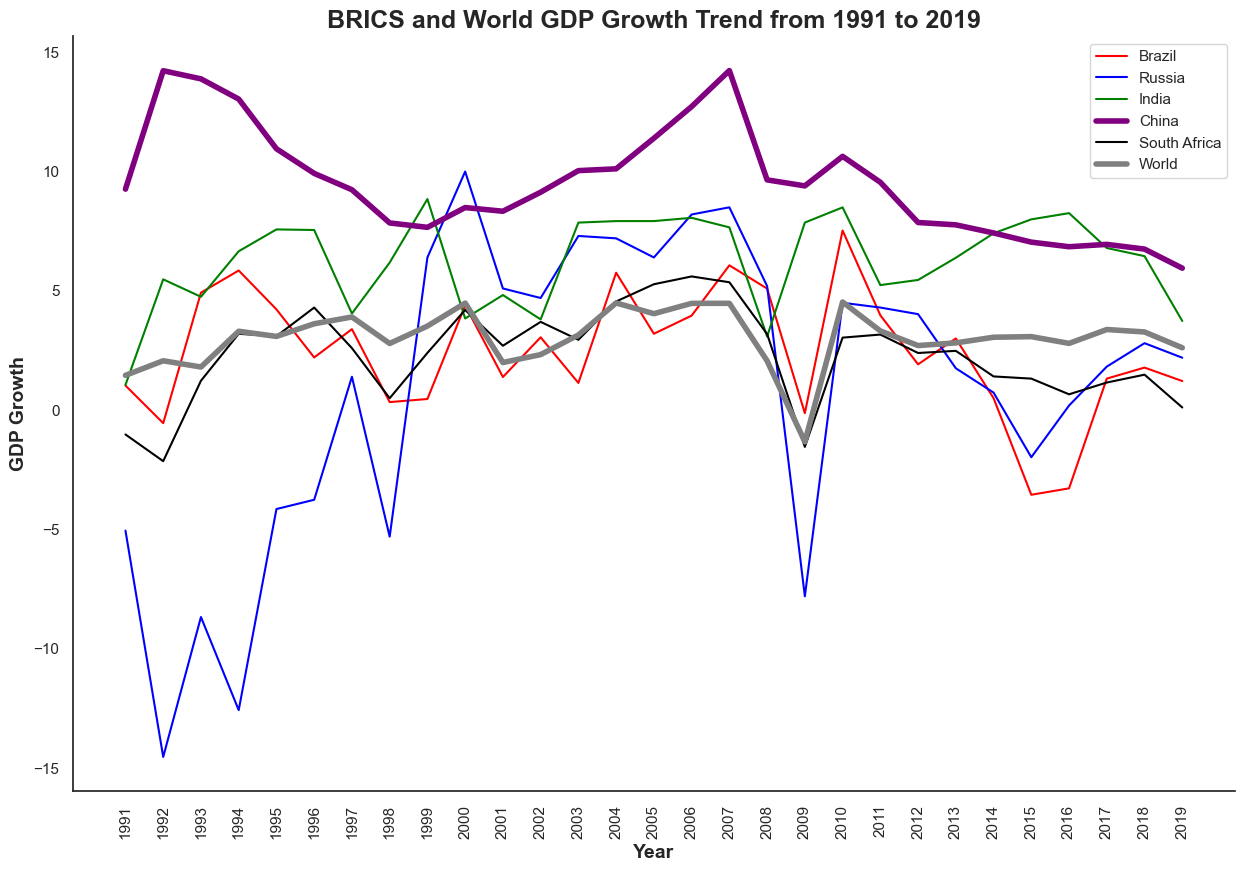

In [67]:
#Creating time series plot for BRICS nations GDP Growth from 1991 to 2019 
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df_gdp_brics_final.index,
         'Brazil GDP Growth', 
         data = df_gdp_brics_final, 
         color = 'red')

plt.plot(df_gdp_brics_final.index,
         'Russia GDP Growth', 
         data = df_gdp_brics_final, 
         color = 'blue')

plt.plot(df_gdp_brics_final.index,
         'India GDP Growth', 
         data = df_gdp_brics_final, 
         color = 'green')

plt.plot(df_gdp_brics_final.index,
         'China GDP Growth', 
         data = df_gdp_brics_final, 
         color = 'purple',
         linewidth=4)

plt.plot(df_gdp_brics_final.index,
         'South Africa GDP Growth', 
         data = df_gdp_brics_final, 
         color = 'black')

plt.plot(df_gdp_brics_final.index,
         'World GDP Growth', 
         data = df_gdp_brics_final, 
         color = 'grey',
         linewidth=4)

plt.title('BRICS and World GDP Growth Trend from 1991 to 2019', 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('Year', 
           fontsize = 14, 
           fontweight = 'bold')

plt.ylabel('GDP Growth', 
           fontsize = 14, 
           fontweight = 'bold')

plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa', 'World'])

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

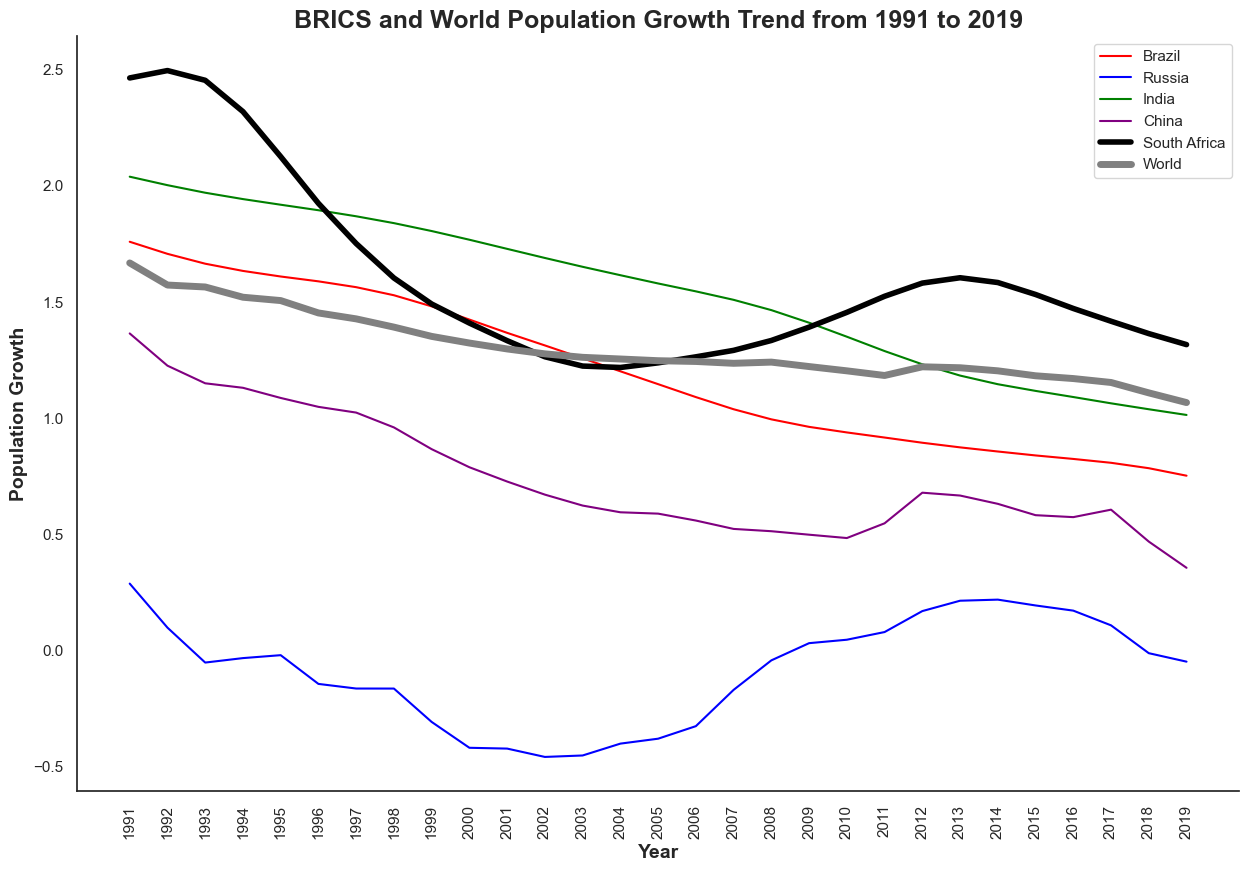

In [85]:
#PLotting the time series for population growth for the BRICS nations from 1991 to 2019
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df_pop_brics_final.index,'Brazil Population Growth',
         data = df_pop_brics_final, 
         color = 'red')
plt.plot(df_pop_brics_final.index, 
         'Russia Population Growth', 
          data = df_pop_brics_final, 
          color = 'blue')

plt.plot(df_pop_brics_final.index,
         'India Population Growth', 
         data = df_pop_brics_final, 
         color = 'green')

plt.plot(df_pop_brics_final.index,
         'China Population Growth', 
         data = df_pop_brics_final, 
         color = 'purple')

plt.plot(df_pop_brics_final.index,
         'South Africa Population Growth', 
         data = df_pop_brics_final, 
         color = 'black', 
        linewidth = 4)

plt.plot(df_pop_brics_final.index,
         'World Population Growth', 
         data = df_pop_brics_final, 
         color = 'grey',
         linewidth=5)

plt.title('BRICS and World Population Growth Trend from 1991 to 2019', 
          fontsize = 18, 
          fontweight = 'bold')

plt.xlabel('Year', 
           fontsize = 14, 
           fontweight = 'bold')

plt.ylabel('Population Growth', 
           fontsize = 14, 
           fontweight = 'bold')

plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa', 'World'])

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)


plt.show()

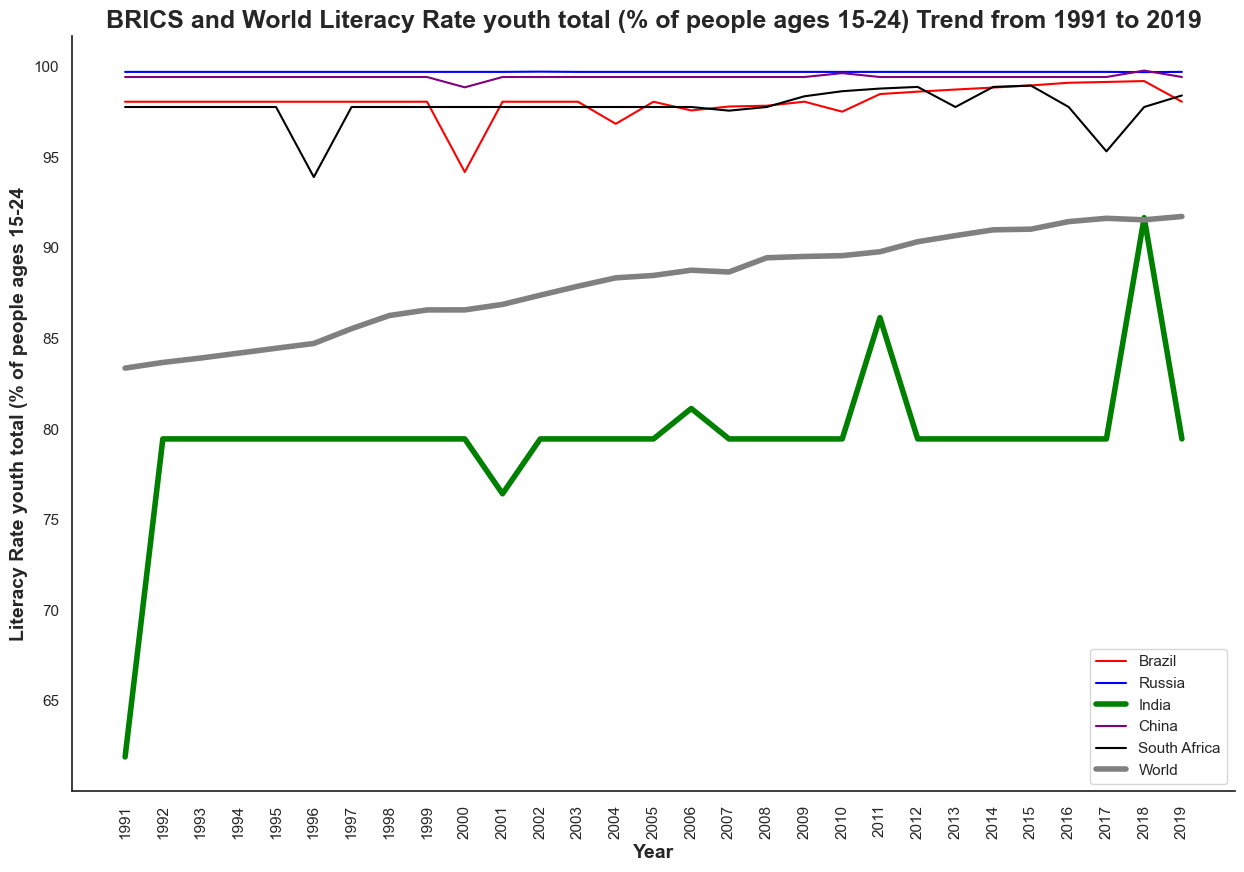

In [69]:
#Creating time series plot for BRICS nations literacy rate from 1991 to 2019 
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df_literacy_brics_final.index,
         'Brazil Literacy Rate youth total (% of people ages 15-24)', 
         data = df_literacy_brics_final, 
         color = 'red')

plt.plot(df_literacy_brics_final.index,
         'Russia Literacy Rate youth total (% of people ages 15-24)', 
         data = df_literacy_brics_final, 
         color = 'blue')

plt.plot(df_literacy_brics_final.index,
         'India Literacy Rate youth total (% of people ages 15-24)', 
         data = df_literacy_brics_final, 
         color = 'green',
         linewidth=4)

plt.plot(df_literacy_brics_final.index,
         'China Literacy Rate youth total (% of people ages 15-24)', 
         data = df_literacy_brics_final, 
         color = 'purple')

plt.plot(df_literacy_brics_final.index,
         'South Africa Literacy Rate youth total (% of people ages 15-24)', 
         data = df_literacy_brics_final, 
         color = 'black')

plt.plot(df_literacy_brics_final.index,
         'World Literacy Rate youth total (% of people ages 15-24)', 
         data = df_literacy_brics_final, 
         color = 'grey',
         linewidth=4)

plt.title('BRICS and World Literacy Rate youth total (% of people ages 15-24) Trend from 1991 to 2019', 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('Year', 
           fontsize = 14, 
           fontweight = 'bold')

plt.ylabel('Literacy Rate youth total (% of people ages 15-24', 
           fontsize = 14, 
           fontweight = 'bold')

plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa', 'World'])

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)


plt.show()

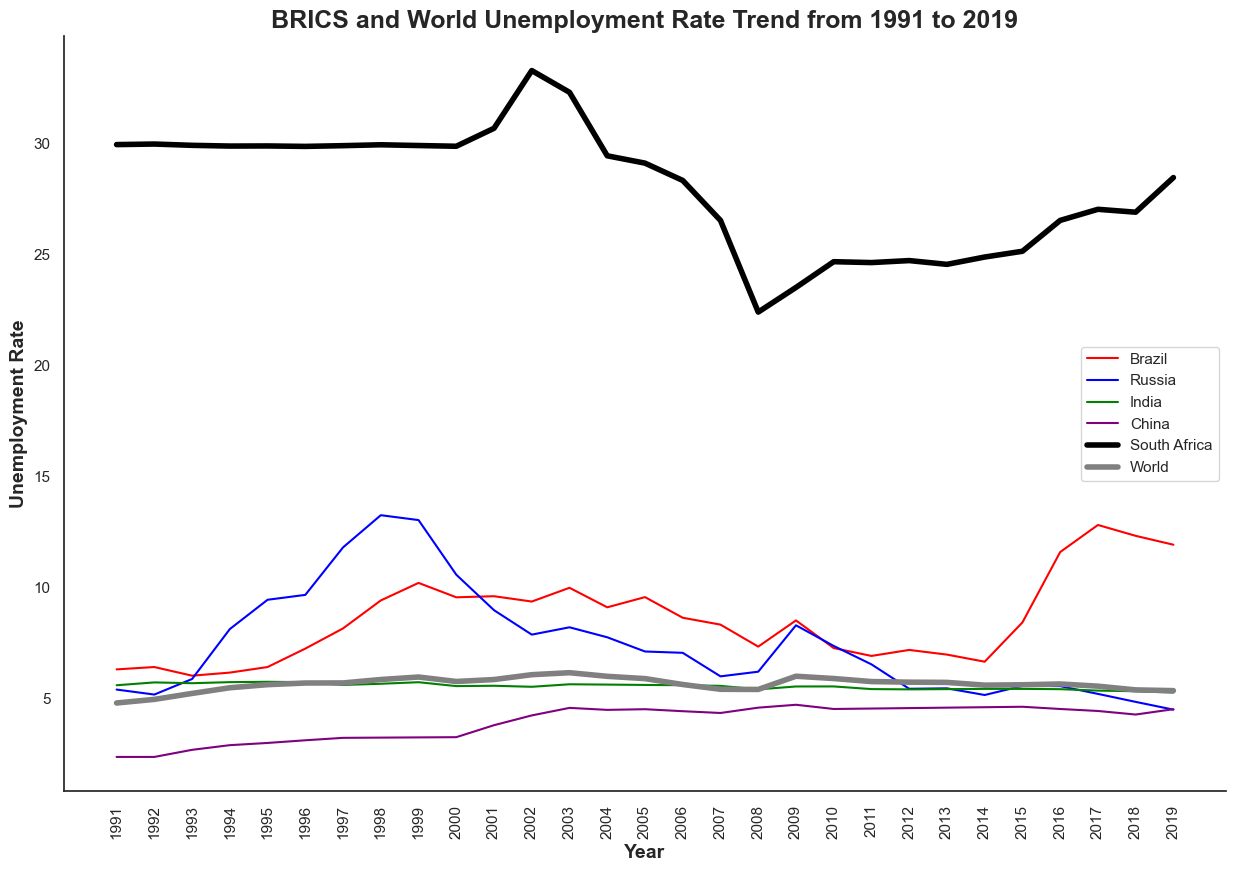

In [70]:
#Creating time series plot for BRICS nations unemployment rate from 1991 to 2019 
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df_unemployment_brics_final.index,
         'Brazil Unemployment', 
         data = df_unemployment_brics_final, 
         color = 'red')

plt.plot(df_unemployment_brics_final.index,
         'Russia Unemployment', 
         data = df_unemployment_brics_final, 
         color = 'blue')

plt.plot(df_unemployment_brics_final.index,
         'India Unemployment', 
         data = df_unemployment_brics_final, 
         color = 'green')

plt.plot(df_unemployment_brics_final.index,
         'China Unemployment', 
         data = df_unemployment_brics_final, 
         color = 'purple')

plt.plot(df_unemployment_brics_final.index,
         'South Africa Unemployment', 
         data = df_unemployment_brics_final, 
         color = 'black',
         linewidth=4)

plt.plot(df_unemployment_brics_final.index,
         'World Unemployment', 
         data = df_unemployment_brics_final, 
         color = 'grey',
         linewidth=4)

plt.title('BRICS and World Unemployment Rate Trend from 1991 to 2019', 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('Year', 
           fontsize = 14, 
           fontweight = 'bold')

plt.ylabel('Unemployment Rate', 
           fontsize = 14, 
           fontweight = 'bold')

plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa', 'World'])

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

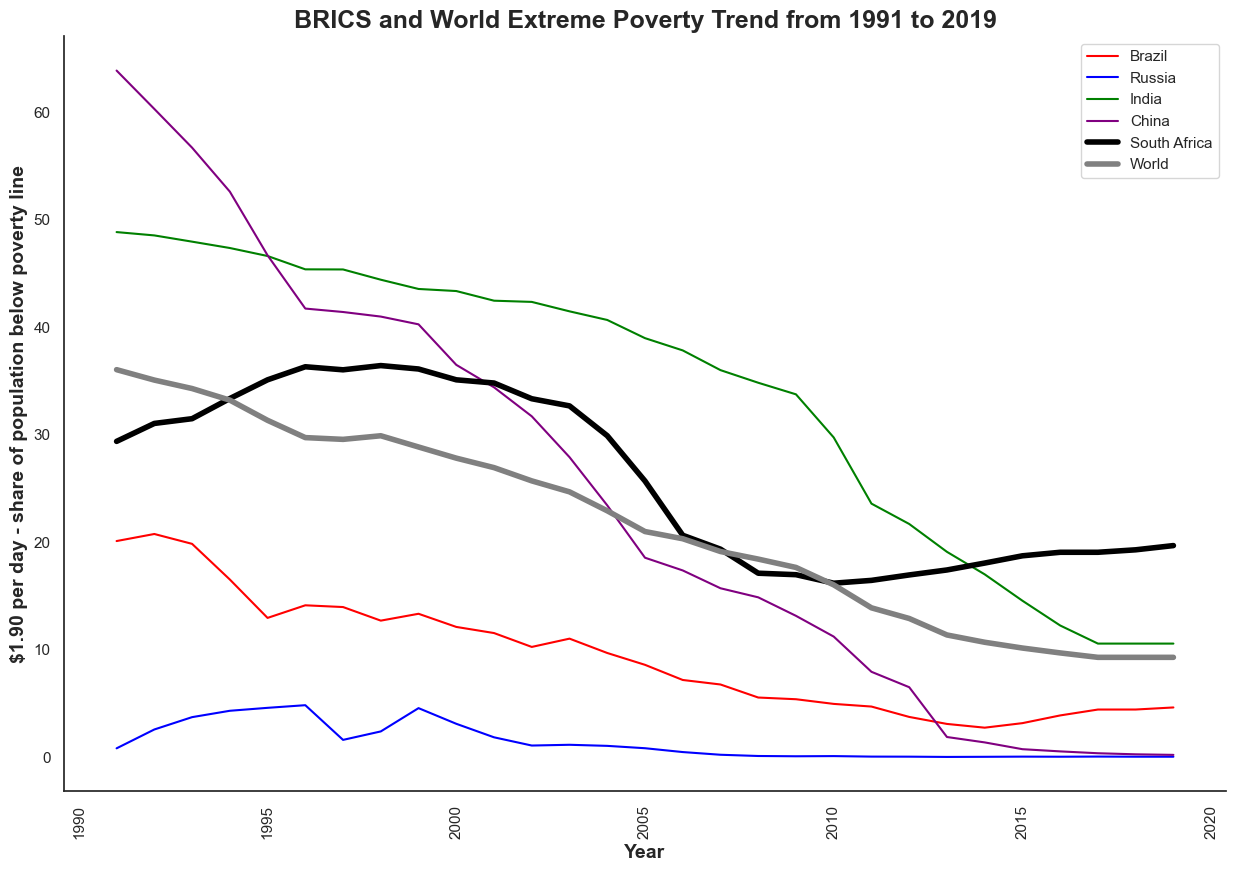

In [71]:
#Creating time series plot for BRICS nations extreme poverty rate from 1991 to 2019 
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df_poverty_brics_final.index,
         'BRA $1.90 per day - share of population below poverty line', 
         data = df_poverty_brics_final, 
         color = 'red')

plt.plot(df_poverty_brics_final.index,
         'RUS $1.90 per day - share of population below poverty line', 
         data = df_poverty_brics_final, 
         color = 'blue')

plt.plot(df_poverty_brics_final.index,
         'IND $1.90 per day - share of population below poverty line', 
         data = df_poverty_brics_final, 
         color = 'green')

plt.plot(df_poverty_brics_final.index,
         'CHN $1.90 per day - share of population below poverty line', 
         data = df_poverty_brics_final, 
         color = 'purple')

plt.plot(df_poverty_brics_final.index,
         'RSA $1.90 per day - share of population below poverty line', 
         data = df_poverty_brics_final, 
         color = 'black',
         linewidth=4)

plt.plot(df_poverty_brics_final.index,
         'World $1.90 per day - share of population below poverty line', 
         data = df_poverty_brics_final, 
         color = 'grey',
         linewidth=4)

plt.title('BRICS and World Extreme Poverty Trend from 1991 to 2019', 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('Year', 
           fontsize = 14, 
           fontweight = 'bold')

plt.ylabel( '$1.90 per day - share of population below poverty line', 
           fontsize = 14, 
           fontweight = 'bold')

plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa', 'World'])

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

From the trend, it is evident that extreme poverty has been on the decline. For South Africa there has been a decline from the mid-90s to the mid-2000s, however, from 2010 there has been a steady increase in extreme poverty which can be contributed to the extremely high unemployment and poor-performing economy.

# Random Forest Regression

## Splitting the data model into training set and test set

In [72]:
#Concatenating the explanatory variables
x = pd.concat([df_gdp_brics_final_growth,
               df_pop_brics_final_growth, 
               df_literacy_rate_final, 
               df_unemployment_rate_final], 
              axis =1)

X = x.values #only taking the values of the dataframe converting to numpy array
y = df_poverty_rate_final.values

In [73]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [74]:
#Fitting the model
model_rand = RandomForestRegressor(random_state=0)
model_rand.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [75]:
y_pred = model_rand.predict(X_test)

## Assessing the metrics

In [76]:
r2_score(y_test, y_pred)

0.9723075732864883

In regression R-squared, also known as the coefficient of determination is an important metric that measures the performance of the model. It works by measuring the variance between the samples in the dataset and those predicted by the model. So the higher the value of R-squared, the better performing the model. 97.23% is a high score for our model

In [77]:
#kfold cross validation
accuracies = cross_val_score(estimator = model_rand, 
                             X = X_train,
                             y = y_train,
                             cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.19 %
Standard Deviation: 6.27 %


In [78]:
#Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print('MSE:' + "{:.2f}".format(mse))
print('RMSE:' + "{:.2f}".format(rmse))

MSE:8.06
RMSE:2.84


MSE is the average squared difference between the predicted values and the actual values in a dataset. The lower the MSE, the better a model fits to the data.

RMSE tells us the square root of the average squared difference between the predicted values and the actual values in a dataset. The lower the RMSE, the better a model fits a dataset.

RMSE makes more sense to use as it is in the same unit and the dependent variable. In the case of this project the RMSE of 2.84 tells us that the average deviation between the predicted points scored and the actual points scored is 2.84.

